In [1]:
from front_tracking_toolkit.experiment import Experiment
from front_tracking_toolkit.viz import visualize_frames

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
exp = Experiment(r'C:\Users\Josh\git\front_tracking_toolkit\front_tracking_toolkit\example_experiment.yaml')

In [3]:
all_data = exp.load_tracking_results()
all_data

Loading Samples:  25%|████████████████▌                                                 | 4/16 [00:01<00:04,  2.72it/s]Warning: tracking results not found for subject 118 and stain ova, expected to find results here: "E:\Flow Pictures - complete data set\Flow Images\analysis\tracking/118/ova/vf.csv"


,t,fi,x,y,vx,vy,wx,wy,th,subject,stain,vm
0,360,1,3.650371,4.836817,-0.001768,-0.000279,-0.001768,-0.000279,NaN,10,ova,0.001790
1,360,1,3.650876,4.833612,NaN,NaN,NaN,NaN,NaN,10,ova,NaN
2,360,1,3.651449,4.830278,NaN,NaN,NaN,NaN,NaN,10,ova,NaN
3,360,1,3.652083,4.826847,-0.001748,-0.000336,-0.001748,-0.000336,NaN,10,ova,0.001780
4,360,1,3.652783,4.823344,NaN,NaN,NaN,NaN,NaN,10,ova,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6546088,3480,1165,17.726154,8.533531,NaN,NaN,NaN,NaN,NaN,127,ova,NaN
6546089,3480,1165,17.724955,8.533387,NaN,NaN,NaN,NaN,NaN,127,ova,NaN
6546090,3480,1165,17.724054,8.532839,-0.000676,0.000677,-0.000676,0.000677,NaN,127,ova,0.000957
6546091,3480,1165,17.723457,8.531891,NaN,NaN,NaN,NaN,NaN,127,ova,NaN


In [12]:
metadata = exp.metadata
vm = pd.pivot_table(all_data, values='vm', index='t', columns='subject', aggfunc=np.mean, fill_value=0)
vm = pd.melt(vm, value_name='vm', ignore_index=False)
#vm['t'] = vm.index
vm = vm.reset_index()
vm['genotype'] = [metadata.loc[(subject, 'ova')]['genotype'] for subject in vm['subject']]
vm['vm'] = vm['vm'] * 1000
vm

,t,subject,vm,genotype
0,60,10,0.000000,Twist CKO+
1,120,10,0.000000,Twist CKO+
2,180,10,0.000000,Twist CKO+
3,240,10,0.000000,Twist CKO+
4,300,10,0.000000,Twist CKO+
...,...,...,...,...
910,3420,9,1.364644,Twist CKO+; Sm22a-Cre
911,3480,9,0.913147,Twist CKO+; Sm22a-Cre
912,3540,9,1.016311,Twist CKO+; Sm22a-Cre
913,3600,9,1.112342,Twist CKO+; Sm22a-Cre


<AxesSubplot:xlabel='t', ylabel='vm'>

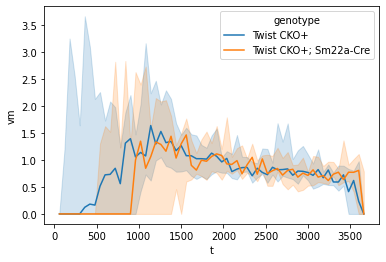

In [13]:
sns.lineplot(data=vm, x='t', y='vm', hue='genotype', markers=True, estimator=np.median)

<AxesSubplot:xlabel='t', ylabel='vm'>

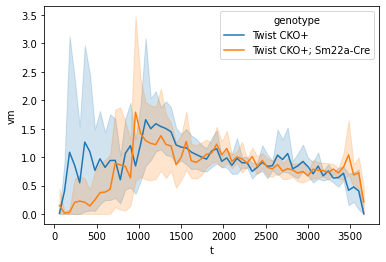

In [14]:
# Without subject 118
vm_no_118 = vm[vm['subject'] != '118']
sns.lineplot(data=vm_no_118, x='t', y='vm', hue='genotype', markers=True)

<AxesSubplot:xlabel='t', ylabel='vm'>

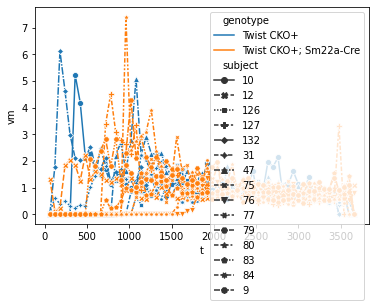

In [7]:
sns.lineplot(data=vm_no_118, x='t', y='vm', style='subject', hue='genotype', markers=True)

In [8]:
pd.pivot_table(all_data, values='vm', index='t', columns='subject', aggfunc=np.mean, fill_value=0)

subject,10,12,126,127,132,31,47,75,76,77,79,80,83,84,9
t,,,,,,,,,,,,,,,
60,0.000000,0.001339,0.000000,0.000000,0.000000,0.000055,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
120,0.000000,0.000129,0.000000,0.000000,0.001786,0.000620,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
180,0.000000,0.000246,0.000000,0.000000,0.006123,0.000390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
240,0.000000,0.001836,0.000000,0.000000,0.004625,0.000509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
300,0.000000,0.002033,0.000000,0.000000,0.002980,0.000310,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,0.000591,0.000967,0.000747,0.000496,0.000894,0.000464,0.000896,0.000660,0.000637,0.000588,0.000591,0.000558,0.001548,0.000704,0.001365
3480,0.000746,0.000751,0.000000,0.003330,0.000000,0.000369,0.000923,0.000615,0.000774,0.000896,0.000612,0.000586,0.000863,0.000459,0.000913
3540,0.000760,0.000800,0.000000,0.000000,0.000000,0.000525,0.000717,0.000776,0.000700,0.000413,0.000616,0.001095,0.000773,0.000845,0.001016
